In [216]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
#from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from collections import Counter #uso para n-gramas
import re # talvez regex vai ajudar na normalizaçao

Esse notebook foi criado para realização das tarefas referentes a análise da extensão do corpus. Aqui tem o cálculo de types, tokens e TTR. Verifiquei, devido ao exemplo dado:
“nos encontramos cara a cara” contém 4 types e 5 tokens. Assim, não posso remover stopwords visto que "a" é um token.
TTR mais alto implica em maior diversidade lexical.

In [217]:
csv_file_path = 'C:/Users/Administrator/Documents/repos/mestrado/visual_analytics/corpus_completo.csv'

# Lendo o csv como um df
df = pd.read_csv(csv_file_path)

#Criando uma cópia
df_va = df.copy()

In [218]:
df_va.head()

,file_name,content,nota
0,20152t4p1166n0r.docx,É inaceitável e constrangedor a violência que ...,0
1,20152t4p1305n0r.docx,A capital paraense já foi considerada uma das ...,0
2,20152t4p1477n0r.docx,A prefeitura municipal respeitosa. ...,0
3,20152t4p1506n0r.docx,Data: 20/10/2015\nDe: Bibiana C. Terra\nPara: ...,0
4,20152t4p1512n0r.docx,Desculpe. Eu não conheco-me a matéria “Azulejo...,0


In [219]:
df_va.groupby('nota').count()

,file_name,content
nota,,
0,25,25
1,211,211
2,628,628
3,715,715
4,477,477
5,237,237


In [220]:
df_chart = pd.DataFrame()

In [221]:
# Número de textos exposto como variável visto que usarei para cálculos de média

df_chart['qtde_textos'] = df_va['nota'].value_counts()
df_chart

,qtde_textos
nota,
3,715
2,628
4,477
5,237
1,211
0,25


In [222]:
nltk.download('stopwords')
nltk.download('punkt') # é um tokenizador, importante para nltk.word_tokenize
# nltk.download('rslp') é um stemmer. acho q nao vou usar
nltk.download('punkt_tab') # Precisei que devia fazer download desse pacote pq o punkt nao tava funcionando

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [223]:
# Pré-processamento

# Devo tirar acentos?? Ex: Belém
# Retirar números? Na duvida, retirei.
# Não fiz stemming visto que poderia perder erros ortográficos

#Retirada de sinais gráficos, pontuações e espaços
def clean_cp(text):
    cleaned = text.lower() #Deixando tudo minúsculo
    cleaned = re.sub('[^\w\s]', '', cleaned) # Removendo pontuacao
    #cleaned = re.sub('[0-9]+', '', cleaned) # Removendo números 
    cleaned = re.sub('\d+', '', cleaned) # Removendo números NÃO TAVA FUNCIONANDO. Começou a funcionar qdo pus o lower como primeiro comando da funçao
    cleaned = re.sub('\s+', ' ', cleaned) # Removendo espaços extras
    cleaned = re.sub('\s+', ' ', cleaned)
    return cleaned.strip() # Removendo tabs

df_va['content'] = df_va['content'].apply(clean_cp)
#df_va['content'] = df_va['content'].apply(stopwords_cp)

In [224]:
df_va['content'].sample(5)

1788    bom dia meu nome é bibiana e moro no sul de be...
280     belém de octubro de senhor da prefeitura munic...
1236    belém de outubro de prezado prefeito eu só uma...
1039    brasília de outubro caro prefeito prefeitura m...
1605    belém de setembro de prefeitura municipal de b...
Name: content, dtype: object

In [225]:
df_va.dtypes

file_name    object
content      object
nota          int64
dtype: object

In [226]:
# Tokenizando SEM retirar stopwords: lembrando q token conta duplicados

def tokenized_cp(text):
   #stopwords = nltk.corpus.stopwords.words('portuguese') # Carregando as stopwords do português
   tokenized = nltk.word_tokenize(text, language='portuguese') #Transforma o texto em tokens
   #text_sem_stopwords = [token for token in tokenized if token not in stopwords] # Deixei stopwords pq imaginei que consideravam mas talvez a divergencia de numero q achei em relaçao a
   # dissertacao seja devido às stopwords
   #return text_sem_stopwords
   return tokenized

df_va['tokenized_content'] = df_va['content'].apply(tokenized_cp)

In [227]:
df_va['tokenized_content'].sample(5)

1310    [belem, de, dezembro, senhores, prefeitura, mu...
552     [de, junho, de, membros, da, prefeitura, munic...
2234    [sr, prefeito, nossa, capital, belém, já, foi,...
785     [carta, à, prefeitura, municipal, de, belém, a...
1332    [senhor, prefeito, da, cidade, de, belem, cord...
Name: tokenized_content, dtype: object

In [228]:
df_va.dtypes

file_name            object
content              object
nota                  int64
tokenized_content    object
dtype: object

In [229]:
# Verificando a qtde de tokens para cada nota (uso o total pra cada nota pro cálculo de TTR)

# Primeiro conto a qtde de tokens para cada texto e crio uma coluna com a contagem
df_va['token_count'] = df_va['tokenized_content'].apply(len)

# Agora, conto de acordo com cada nota        
df_chart['qtde_total_tokens_nota'] = df_va.groupby('nota')['token_count'].sum()
df_chart

,qtde_textos,qtde_total_tokens_nota
nota,,
3,715,123013
2,628,99444
4,477,88216
5,237,47602
1,211,30289
0,25,2284


In [230]:
df_va.head()

,file_name,content,nota,tokenized_content,token_count
0,20152t4p1166n0r.docx,é inaceitável e constrangedor a violência que ...,0,"[é, inaceitável, e, constrangedor, a, violênci...",106
1,20152t4p1305n0r.docx,a capital paraense já foi considerada uma das ...,0,"[a, capital, paraense, já, foi, considerada, u...",99
2,20152t4p1477n0r.docx,a prefeitura municipal respeitosa sou a public...,0,"[a, prefeitura, municipal, respeitosa, sou, a,...",65
3,20152t4p1506n0r.docx,data de bibiana c terra para prefeitura munici...,0,"[data, de, bibiana, c, terra, para, prefeitura...",95
4,20152t4p1512n0r.docx,desculpe eu não conhecome a matéria azulejos v...,0,"[desculpe, eu, não, conhecome, a, matéria, azu...",18


In [231]:
# Verificando a qtde de tokens MÉDIA para cada nota
df_chart['qtde_media_tokens'] = df_chart['qtde_total_tokens_nota'] / df_chart['qtde_textos']
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens
nota,,,
3,715,123013,172.046154
2,628,99444,158.350318
4,477,88216,184.939203
5,237,47602,200.852321
1,211,30289,143.549763
0,25,2284,91.360000


In [232]:
# Separando em types (pego tokens e retiro duplicados)
df_va['types_content'] = df_va['tokenized_content'].apply(lambda tokens: list(set(tokens)))

In [233]:
# Verificando a qtde de types para cada nota

# Primeiro a qtde de types para cada texto e crio uma coluna com a contagem
df_va['types_count'] = df_va['types_content'].apply(len)

# Agora, conto de acordo com cada nota
df_chart['qtde_total_types_nota'] = df_va.groupby('nota')['types_count'].sum()
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota
nota,,,,
3,715,123013,172.046154,80734
2,628,99444,158.350318,66313
4,477,88216,184.939203,57277
5,237,47602,200.852321,30632
1,211,30289,143.549763,20524
0,25,2284,91.360000,1659


In [234]:
# Verificando a qtde de types MÉDIA para cada nota
df_chart['qtde_media_types'] = df_chart['qtde_total_types_nota'] / df_chart['qtde_textos']
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota,qtde_media_types
nota,,,,,
3,715,123013,172.046154,80734,112.914685
2,628,99444,158.350318,66313,105.593949
4,477,88216,184.939203,57277,120.077568
5,237,47602,200.852321,30632,129.248945
1,211,30289,143.549763,20524,97.270142
0,25,2284,91.360000,1659,66.360000


In [235]:
# Cálculo de TTR: TTR = qtde de types / qtde de tokens * 100 (em percentual mesmo)
# Aviso: fiz o cálculo de ttr_medio = (qtde_media_types / qtde_media_tokens) * 100 e obtive os mesmos valores
df_chart['TTR'] = (df_chart['qtde_total_types_nota'] / df_chart['qtde_total_tokens_nota']) * 100
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota,qtde_media_types,TTR
nota,,,,,,
3,715,123013,172.046154,80734,112.914685,65.630462
2,628,99444,158.350318,66313,105.593949,66.683762
4,477,88216,184.939203,57277,120.077568,64.928131
5,237,47602,200.852321,30632,129.248945,64.350237
1,211,30289,143.549763,20524,97.270142,67.760573
0,25,2284,91.360000,1659,66.360000,72.635727


In [236]:
# Número mínimo de tokens por nota

# Primeiro conto a qtde de tokens para cada texto e crio uma coluna com a contagem    >> Essas 2 linhas eu repeti mtas vzs no código. É só cortar fora. A variável já foi calculada!
df_va['token_count'] = df_va['tokenized_content'].apply(len)

# Agora, conto o número minimo de tokens para cada nota        
df_chart['qtde_tokens_min'] = df_va.groupby('nota')['token_count'].min()

In [237]:
# Número máximo de tokens por nota

# Primeiro conto a qtde de tokens para cada texto e crio uma coluna com a contagem
df_va['token_count'] = df_va['tokenized_content'].apply(len)

# Agora, conto o número máximo de tokens para cada nota        
df_chart['qtde_tokens_max'] = df_va.groupby('nota')['token_count'].max()
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota,qtde_media_types,TTR,qtde_tokens_min,qtde_tokens_max
nota,,,,,,,,
3,715,123013,172.046154,80734,112.914685,65.630462,74,410
2,628,99444,158.350318,66313,105.593949,66.683762,48,338
4,477,88216,184.939203,57277,120.077568,64.928131,92,351
5,237,47602,200.852321,30632,129.248945,64.350237,107,346
1,211,30289,143.549763,20524,97.270142,67.760573,44,321
0,25,2284,91.360000,1659,66.360000,72.635727,17,200


In [238]:
# Desvio padrão do número de tokens por nota

# Primeiro conto a qtde de tokens para cada texto e crio uma coluna com a contagem
df_va['token_count'] = df_va['tokenized_content'].apply(len)

# Agora, conto o número máximo de tokens para cada nota
df_chart['desvpad_qtde_tokens'] = df_va.groupby('nota')['token_count'].std()
df_chart

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota,qtde_media_types,TTR,qtde_tokens_min,qtde_tokens_max,desvpad_qtde_tokens
nota,,,,,,,,,
3,715,123013,172.046154,80734,112.914685,65.630462,74,410,40.964415
2,628,99444,158.350318,66313,105.593949,66.683762,48,338,44.609182
4,477,88216,184.939203,57277,120.077568,64.928131,92,351,41.778760
5,237,47602,200.852321,30632,129.248945,64.350237,107,346,45.771625
1,211,30289,143.549763,20524,97.270142,67.760573,44,321,46.681098
0,25,2284,91.360000,1659,66.360000,72.635727,17,200,53.343135


In [239]:
df_chart['nota_real'] = [3, 2, 4, 5, 1, 0]
df_chart.sort_values('nota_real')

,qtde_textos,qtde_total_tokens_nota,qtde_media_tokens,qtde_total_types_nota,qtde_media_types,TTR,qtde_tokens_min,qtde_tokens_max,desvpad_qtde_tokens,nota_real
nota,,,,,,,,,,
0,25,2284,91.360000,1659,66.360000,72.635727,17,200,53.343135,0
1,211,30289,143.549763,20524,97.270142,67.760573,44,321,46.681098,1
2,628,99444,158.350318,66313,105.593949,66.683762,48,338,44.609182,2
3,715,123013,172.046154,80734,112.914685,65.630462,74,410,40.964415,3
4,477,88216,184.939203,57277,120.077568,64.928131,92,351,41.778760,4
5,237,47602,200.852321,30632,129.248945,64.350237,107,346,45.771625,5


In [240]:
df_chart.dtypes

qtde_textos                 int64
qtde_total_tokens_nota      int64
qtde_media_tokens         float64
qtde_total_types_nota       int64
qtde_media_types          float64
TTR                       float64
qtde_tokens_min             int64
qtde_tokens_max             int64
desvpad_qtde_tokens       float64
nota_real                   int64
dtype: object

In [243]:
# Criando gráfico types, tokens, TTR

# Criando dataset somente com as colunas que quero mostrar no gráfico:
df_chart_ttr = df_chart[['nota_real', 'qtde_total_tokens_nota', 'qtde_total_types_nota', 'TTR']]

# Aggregate data by 'nota' (or x-axis grouping) by summing
grouped_data = df_chart_ttr.groupby('nota_real').sum()

grouped_data

,qtde_total_tokens_nota,qtde_total_types_nota,TTR
nota_real,,,
0,2284,1659,72.635727
1,30289,20524,67.760573
2,99444,66313,66.683762
3,123013,80734,65.630462
4,88216,57277,64.928131
5,47602,30632,64.350237


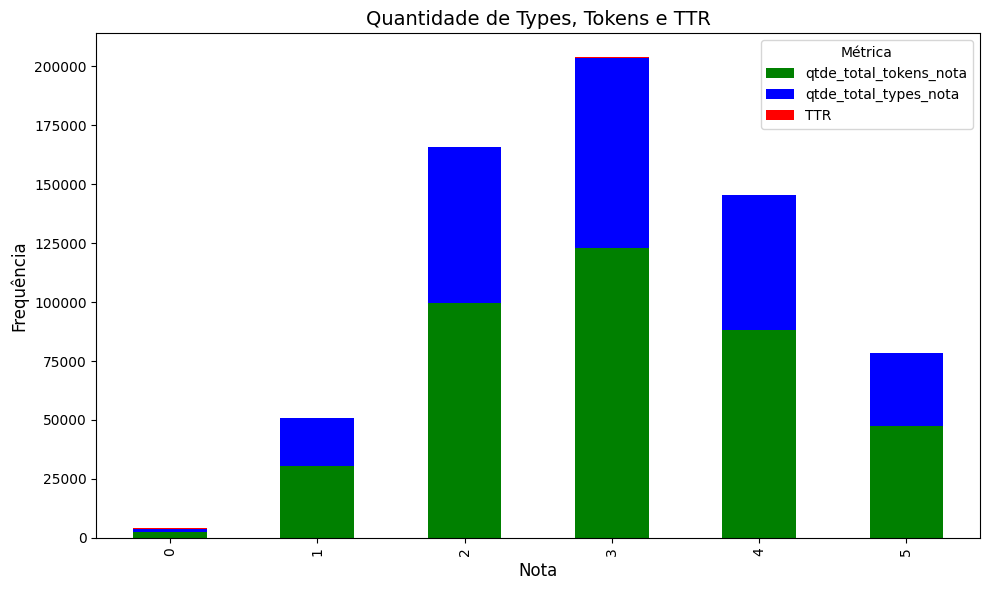

In [248]:
# Plot the stacked bar chart

grouped_data.plot(
    kind='bar',  # Bar chart
    stacked=True,  # Stacked bars
    color=['green', 'blue', 'red'],  # Colors for the bars
    figsize=(10, 6)  # Adjust the figure size
)

# Add labels and title
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Quantidade de Types, Tokens e TTR', fontsize=14)

# Show legend
plt.legend(title="Métrica", fontsize=10)
plt.tight_layout()
plt.show()

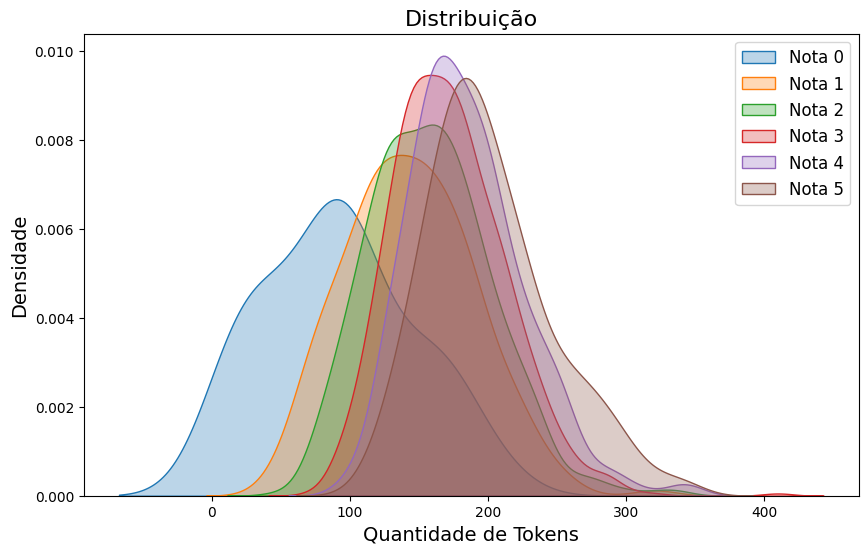

In [246]:
# Criação de gráfico com a distribuição do número de tokens (senão, número mínimo e máximo de tokens que é o que pede na tarefa 2)

plt.figure(figsize=(10, 6))

# Plot a KDE for each grade
for n in df_va['nota'].unique():
    sns.kdeplot(
        data=df_va[df_va['nota'] == n],
        x='token_count',
        label=f'Nota {n}',
        fill=True,
        alpha=0.3
    )

# Add labels and title
plt.title('Distribuição', fontsize=16)
plt.xlabel('Quantidade de Tokens', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.legend(fontsize=12)
plt.show()

# The density on the y-axis in the context of a Kernel Density Estimation (KDE) plot represents a smoothed probability distribution of the data
